Import packages

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from treeinterpreter import treeinterpreter as ti

Import files containing all relevant data

In [49]:
df = pd.read_csv('Trend_tabell7.csv', index_col=0, sep=',')
df

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Mean SD max,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E,Q- spec,Q-95 spec,Q-5 spec
0,2.13.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1879.197245,-1.0,271.364320,1.0,58.001339,1.0,0.392531,40.404675,3.092014,140.868794
1,2.32.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,794.471094,0.0,85.878275,0.0,93.734395,1.0,0.656346,22.035246,3.800504,61.091365
2,2.142.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,768.382971,0.0,53.060611,0.0,137.502855,1.0,1.167794,15.275147,2.243039,51.582771
3,2.268.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1549.467074,0.0,225.350191,1.0,63.378361,1.0,0.365685,32.884382,1.210085,123.821120
4,2.279.0,increasing,1,increasing,0.5,no trend,0,no trend,0,increasing,...,1013.364774,0.0,76.034943,1.0,136.724436,1.0,1.202469,20.503860,2.812010,69.168333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,308.1.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,1557.724216,0.0,169.142100,0.0,98.330120,1.0,0.881928,32.499509,3.309569,122.088837
119,311.4.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,NaN,NaN,NaN,NaN,NaN,1.0,0.860267,13.330848,4.790052,32.317603
120,311.460.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,900.118874,0.0,83.155907,0.0,109.441859,1.0,0.868440,20.766787,4.590006,58.243358
121,313.10.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,582.628806,0.0,31.181174,0.0,154.597927,1.0,1.268005,14.897455,1.515315,47.420360


Drop rows with Nan values

In [50]:
df = df.dropna()
df

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Mean SD max,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E,Q- spec,Q-95 spec,Q-5 spec
0,2.13.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1879.197245,-1.0,271.364320,1.0,58.001339,1.0,0.392531,40.404675,3.092014,140.868794
1,2.32.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,794.471094,0.0,85.878275,0.0,93.734395,1.0,0.656346,22.035246,3.800504,61.091365
2,2.142.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,768.382971,0.0,53.060611,0.0,137.502855,1.0,1.167794,15.275147,2.243039,51.582771
3,2.268.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1549.467074,0.0,225.350191,1.0,63.378361,1.0,0.365685,32.884382,1.210085,123.821120
4,2.279.0,increasing,1,increasing,0.5,no trend,0,no trend,0,increasing,...,1013.364774,0.0,76.034943,1.0,136.724436,1.0,1.202469,20.503860,2.812010,69.168333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,307.7.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,2507.295448,-1.0,322.999761,1.0,76.146903,1.0,0.720401,40.214872,3.865429,166.323692
118,308.1.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,1557.724216,0.0,169.142100,0.0,98.330120,1.0,0.881928,32.499509,3.309569,122.088837
120,311.460.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,900.118874,0.0,83.155907,0.0,109.441859,1.0,0.868440,20.766787,4.590006,58.243358
121,313.10.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,582.628806,0.0,31.181174,0.0,154.597927,1.0,1.268005,14.897455,1.515315,47.420360


Test the train_test_split method

In [51]:
from sklearn.model_selection import train_test_split

X = df[['Area', 'Lon', 'Lat', '%_agr', '%_lake', '%_bog', '%_eff_lake', 
       '%_forest', '%_glacier', '%_mountain', '%_urban', 'H min', 'H max', 'L catchment', 'Q- spec',
       'Q-95 spec', 'Q-5 spec', 'P-', 'P- trend', 'P- min', 'P- max', 
       'T-', 'T- trend', 'T- min', 'T- max', 'SD max trend', 
       'Mean SD max', 'Mean SWE trend', 'Mean SWE', 'Mean SM trend', 'Mean SM', 'Mean E trend', 
       'Mean E']]


y = df['AM30summer trend 5%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Test the random forest method

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(max_depth=10, n_estimators=100)
rf.fit(X_train, y_train)
#y_pred=rf.predict(X_test)

RandomForestClassifier(max_depth=10)

Test prediction and feature importances

In [54]:
prediction, bias, contributions = ti.predict(rf, X_test)

In [55]:
rf.feature_importances_

array([0.0347887 , 0.02733546, 0.06525586, 0.02948884, 0.02771577,
       0.0130453 , 0.01452839, 0.03985398, 0.00965743, 0.03280871,
       0.06622849, 0.02284471, 0.04142787, 0.03414253, 0.02654884,
       0.05730688, 0.04539209, 0.01926073, 0.08129803, 0.03728192,
       0.01206848, 0.03382071, 0.01187579, 0.0215733 , 0.04554128,
       0.00212296, 0.02029087, 0.00414811, 0.02881178, 0.00112973,
       0.06165235, 0.00066138, 0.03009269])

In [56]:
contributions

array([[[ 0.03319549, -0.03948249,  0.00628699],
        [ 0.02402461, -0.02194464, -0.00207998],
        [ 0.01713172,  0.00595976, -0.02309148],
        ...,
        [ 0.03474964, -0.05655484,  0.0218052 ],
        [ 0.00111111, -0.00111111,  0.        ],
        [ 0.01261698, -0.01657627,  0.00395929]],

       [[-0.00107816,  0.00300734, -0.00192918],
        [ 0.02163939, -0.01040557, -0.01123382],
        [ 0.02460745,  0.00190801, -0.02651546],
        ...,
        [ 0.0069197 ,  0.01240441, -0.01932411],
        [ 0.        ,  0.        ,  0.        ],
        [-0.00109832,  0.00595923, -0.00486091]],

       [[ 0.03756895, -0.04330901,  0.00574006],
        [ 0.020244  , -0.01204521, -0.00819879],
        [ 0.02806028,  0.01686587, -0.04492614],
        ...,
        [ 0.02367085, -0.04299371,  0.01932286],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.00578841, -0.01473877,  0.00895036]],

       ...,

       [[ 0.00419787, -0.00986018,  0.00566231],
        [-0

In [57]:
y_pred=rf.predict(X_test)
scores = pd.DataFrame()
scores['y test'] = y_test
scores['y result'] = y_pred
print(scores)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

     y test  y result
84        0         0
115       0         0
77        0         0
85        0         0
121       0         1
112       0         0
90        0         0
117       0         0
31        0         0
1         1         0
105       0         0
38        0         0
92        0         0
65        0         0
23        1         0
61        0         0
50        0         0
109       0         0
91       -1         0
116       0         0
2         0         0
120       1         0
3         0         0
43        0         0
27        1         0
104       0         0
70        0         0
86        0         0
74        0         0
110      -1         0
88        0         0
113       0         0
72        0         0
19        1         1
24        1         0
87        0         0
56        0         0
39        0         0


0.7894736842105263

In [58]:
rf.feature_importances_

array([0.0347887 , 0.02733546, 0.06525586, 0.02948884, 0.02771577,
       0.0130453 , 0.01452839, 0.03985398, 0.00965743, 0.03280871,
       0.06622849, 0.02284471, 0.04142787, 0.03414253, 0.02654884,
       0.05730688, 0.04539209, 0.01926073, 0.08129803, 0.03728192,
       0.01206848, 0.03382071, 0.01187579, 0.0215733 , 0.04554128,
       0.00212296, 0.02029087, 0.00414811, 0.02881178, 0.00112973,
       0.06165235, 0.00066138, 0.03009269])

Test making feature importance plot

Text(0.5, 0, 'Random Forest Feature Importance')

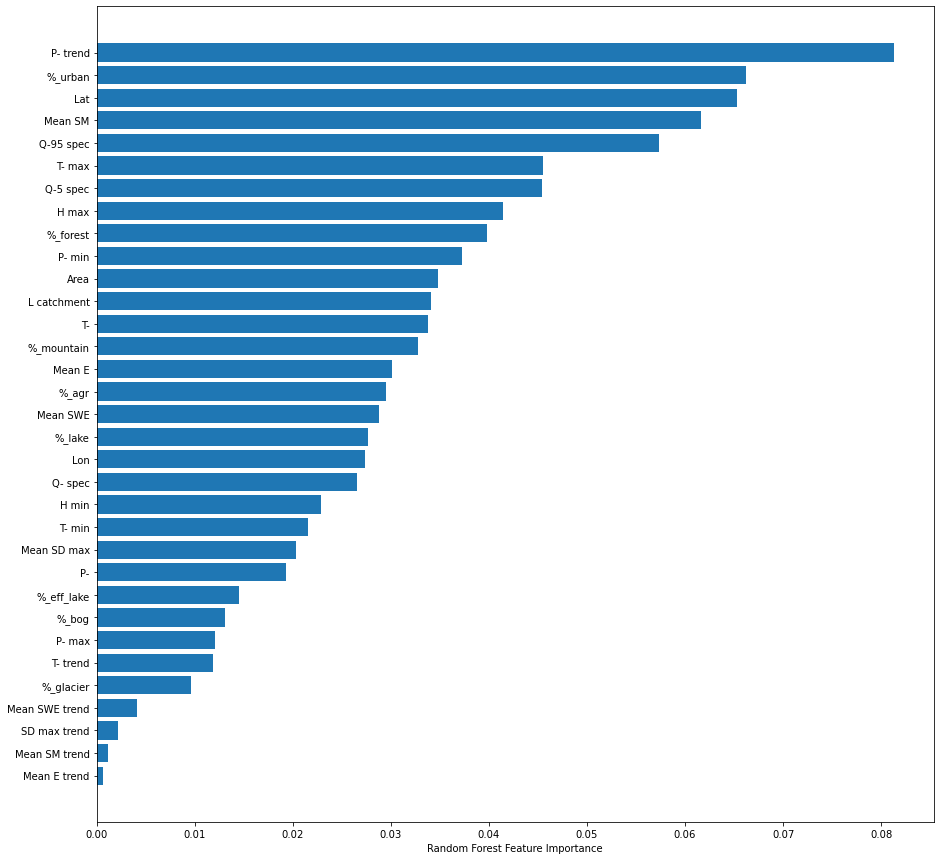

In [59]:
plt.figure(figsize=[15,15])
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

List or target variables annd list of explanation variables. Iterate over them in for loop and predict one target variable each time, storing accuracy score and feature importances for each model

In [60]:


target30 = df[['AM30year trend 5%', 'AM30summer trend 5%', 'AM30winter trend 5%',
       'AM30spring trend 30%', 'AM30autumn trend 30%']]

X30 = df[['AM30year trend 5%', 'AM30summer trend 5%', 'AM30winter trend 5%',
       'AM30spring trend 30%', 'AM30autumn trend 30%', 'Area', 'Lon', 'Lat', '%_agr', '%_lake', '%_bog', '%_eff_lake', 
       '%_forest', '%_glacier', '%_mountain', '%_urban', 'H min', 'H max', 'L catchment', 'Q- spec',
       'Q-95 spec', 'Q-5 spec', 'P-', 'P- trend', 'P- min', 'P- max', 
       'T-', 'T- trend', 'T- min', 'T- max', 
       'SD max trend', 'Mean SD max', 'Mean SWE trend', 'Mean SWE', 'Mean SM trend', 'Mean SM', 'Mean E trend', 
       'Mean E']]

ytest30 = []
y_pred30 = []
fi_30 = []
fi_30_arg = []

for i in target30:
       y = target30[i]
       X_target30 = X30.drop(i, axis=1)

       X_train30, X_test30, y_train30, y_test30 = train_test_split(X_target30, y, test_size=0.33, random_state=42, stratify=y)

       clf = RandomForestClassifier()
       clf.fit(X_train30, y_train30)
       ytest30.append(y_test30)
       y_pred30.append(clf.predict(X_test30))
       sorted_idx30=clf.feature_importances_.argsort()
       fi_30.append(sorted_idx30)
       fi_30_arg.append(clf.feature_importances_[sorted_idx30])
   

target7 = df[['AM7year trend 5%', 'AM7summer trend 5%', 'AM7winter trend 5%',
       'AM7spring trend 30%', 'AM7autumn trend 30%']]

X7 = df[['AM7year trend 5%', 'AM7summer trend 5%', 'AM7winter trend 5%',
       'AM7spring trend 30%', 'AM7autumn trend 30%', 'Area', 'Lon', 'Lat', '%_agr', '%_lake', '%_bog', '%_eff_lake', 
       '%_forest', '%_glacier', '%_mountain', '%_urban', 'H min', 'H max', 'L catchment', 'Q- spec',
       'Q-95 spec', 'Q-5 spec', 'P-', 'P- trend', 'P- min', 'P- max', 
       'T-', 'T- trend', 'T- min', 'T- max', 
       'SD max trend', 'Mean SD max', 'Mean SWE trend', 'Mean SWE', 'Mean SM trend', 'Mean SM', 'Mean E trend', 
       'Mean E']]#,  'Psummer 5%', 'Pwinter 5%', 'Pautumn 5%', 'Pspring 5%',
       #'Tsummer 5%', 'Twinter 5%', 'Tspring 5%', 'Tautumn 5%']]

ytest7 = []
y_pred7 = []
fi_7 = []
fi_7_arg = []

for i in target7:
       y = target7[i]
       X_target7 = X7.drop(i, axis=1)

       X_train7, X_test7, y_train7, y_test7 = train_test_split(X_target7, y, test_size=0.33, random_state=42, stratify=y)

       clf = RandomForestClassifier()
       clf.fit(X_train7, y_train7)
       ytest7.append(y_test7)
       y_pred7.append(clf.predict(X_test7))
       sorted_idx7=clf.feature_importances_.argsort()
       fi_7.append(sorted_idx7)
       fi_7_arg.append(clf.feature_importances_[sorted_idx7])


Printing accuracy scores

In [61]:
for i, j, k, l in zip(y_pred7, y_pred30, ytest7, ytest30):
       scores['y test'] = k
       scores['y result'] = i
       print("Accuracy score AM7: ", accuracy_score(k, i))  
       scores['y test'] = l
       scores['y result'] = j
       print("Accuracy score AM30: ", accuracy_score(l, j))  

Accuracy score AM7:  0.8421052631578947
Accuracy score AM30:  0.8421052631578947
Accuracy score AM7:  0.7631578947368421
Accuracy score AM30:  0.7894736842105263
Accuracy score AM7:  0.8421052631578947
Accuracy score AM30:  0.8421052631578947
Accuracy score AM7:  0.6578947368421053
Accuracy score AM30:  0.7368421052631579
Accuracy score AM7:  0.8157894736842105
Accuracy score AM30:  0.868421052631579


Running the decision tree method, to collect feature importances from this method.

In [ ]:
%run start_ML.ipynb

Plotting feature importances for the target variables, sorted by season

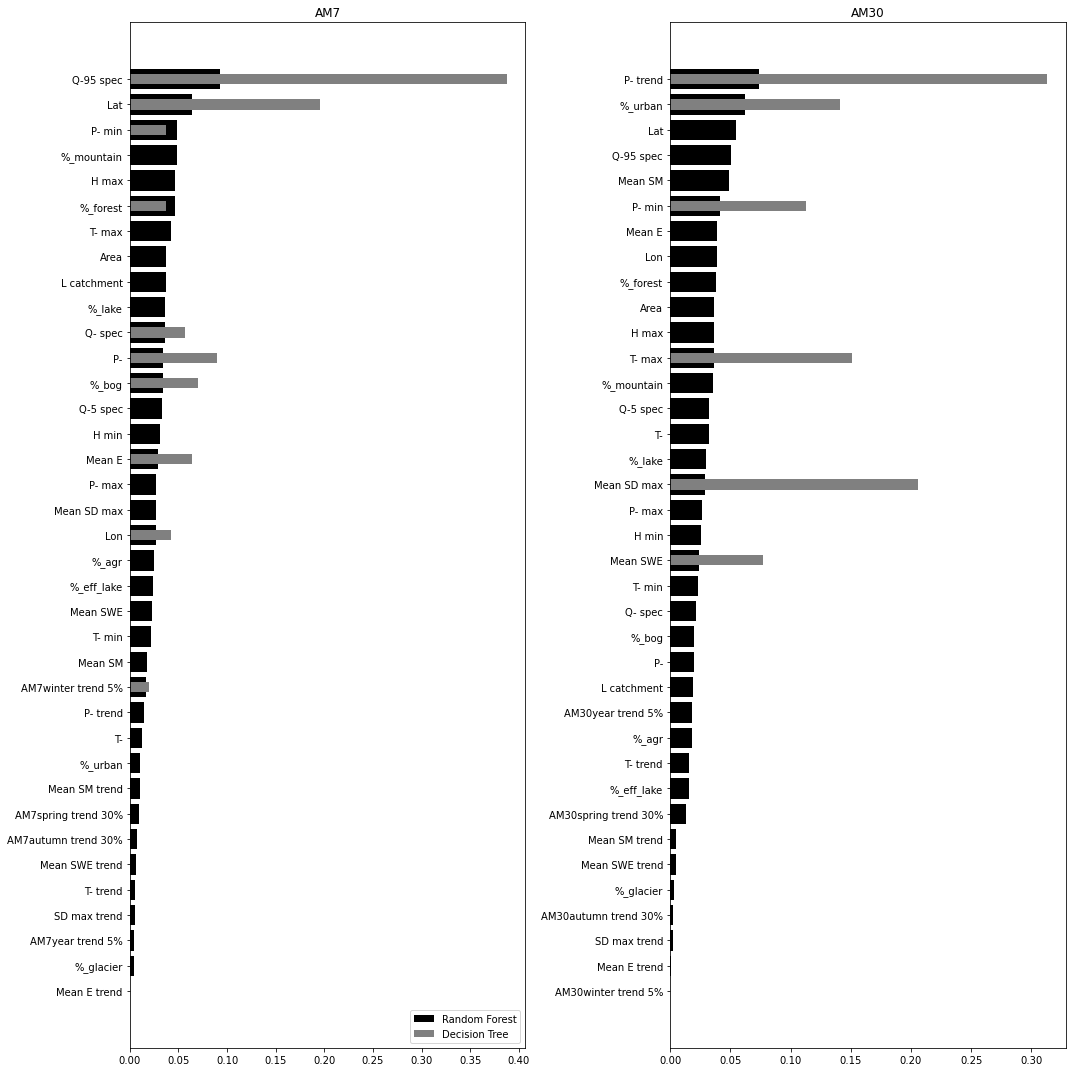

In [72]:
X7summer = X7.drop('AM7summer trend 5%', axis=1)
X30summer = X30.drop('AM30summer trend 5%', axis=1)

fig = plt.figure(figsize=[15,15])
w1 = 0.6
w2=0.4
plt.subplot(1,2,1)
plt.title("AM7")
plt.barh(X7summer.columns[fi_7[1]], fi_7_arg[1],  color='black', label="Random Forest")
#plt.barh(X7summer.columns[ft_imp7[1]], ft_imp7_arg[1], left=fi_7_arg[1], color='grey', label="Decision Tree")
plt.barh(X7summer.columns[ft_imp7[1]], ft_imp7_arg[1], color='grey', label="Decision Tree", height=w2)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.title("AM30")
plt.barh(X30summer.columns[fi_30[1]], fi_30_arg[1],  color='black')
#plt.barh(X30summer.columns[ft_imp30[1]], ft_imp30_arg[1], left=fi_30_arg[1], color='grey')
plt.barh(X30summer.columns[ft_imp30[1]], ft_imp30_arg[1], color='grey', height=w2)
plt.tight_layout()

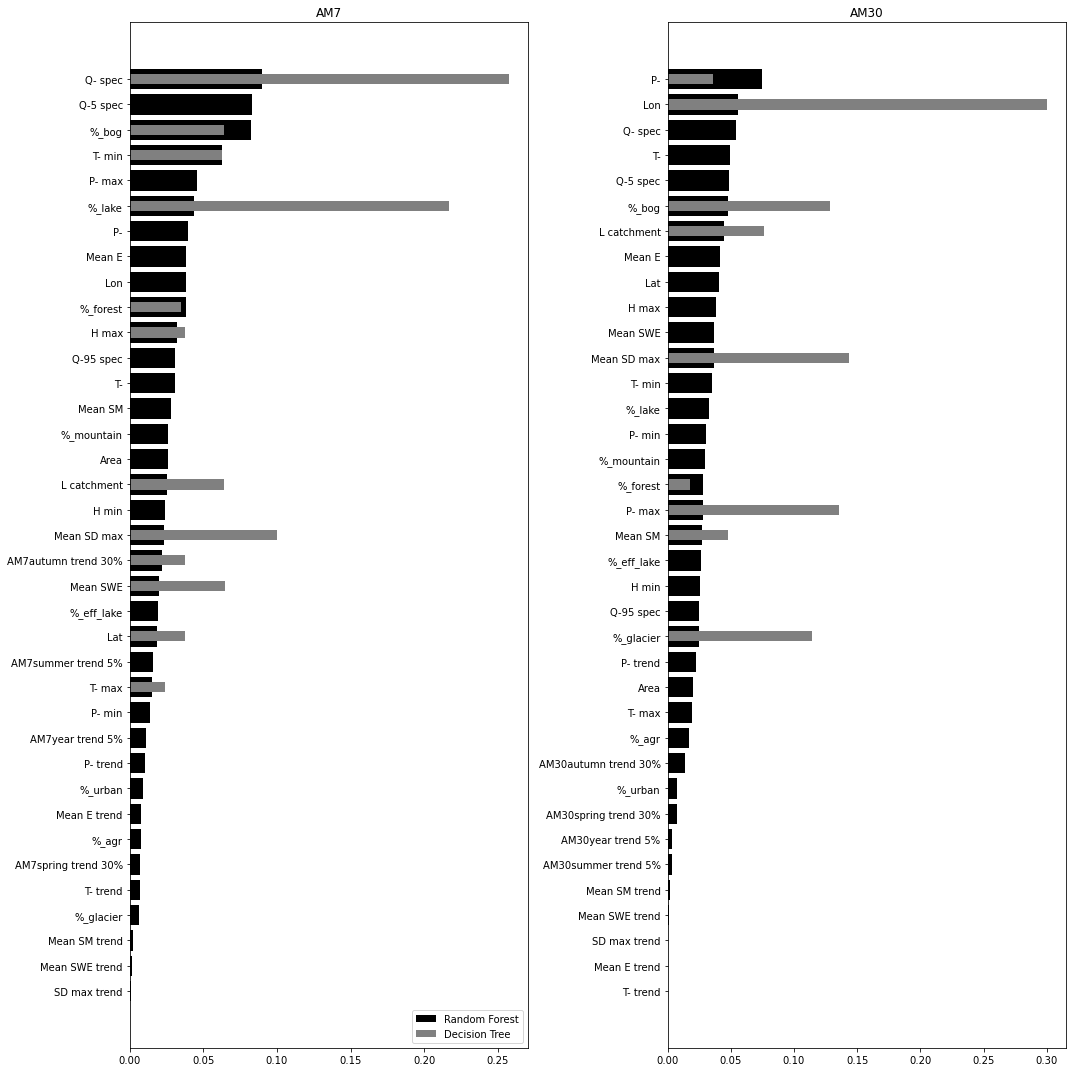

In [73]:
X7winter = X7.drop('AM7winter trend 5%', axis=1)
X30winter = X30.drop('AM30winter trend 5%', axis=1)

fig = plt.figure(figsize=[15,15])
w1 = 0.6
plt.subplot(1,2,1)
plt.title("AM7")
plt.barh(X7winter.columns[fi_7[2]], fi_7_arg[2],  color='black', label="Random Forest")
plt.barh(X7winter.columns[ft_imp7[2]], ft_imp7_arg[2], color='grey', label="Decision Tree", height=w2)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.title("AM30")
plt.barh(X30winter.columns[fi_30[2]], fi_30_arg[2],  color='black')
plt.barh(X30winter.columns[ft_imp30[2]], ft_imp30_arg[2], color='grey', height=w2)
plt.tight_layout()

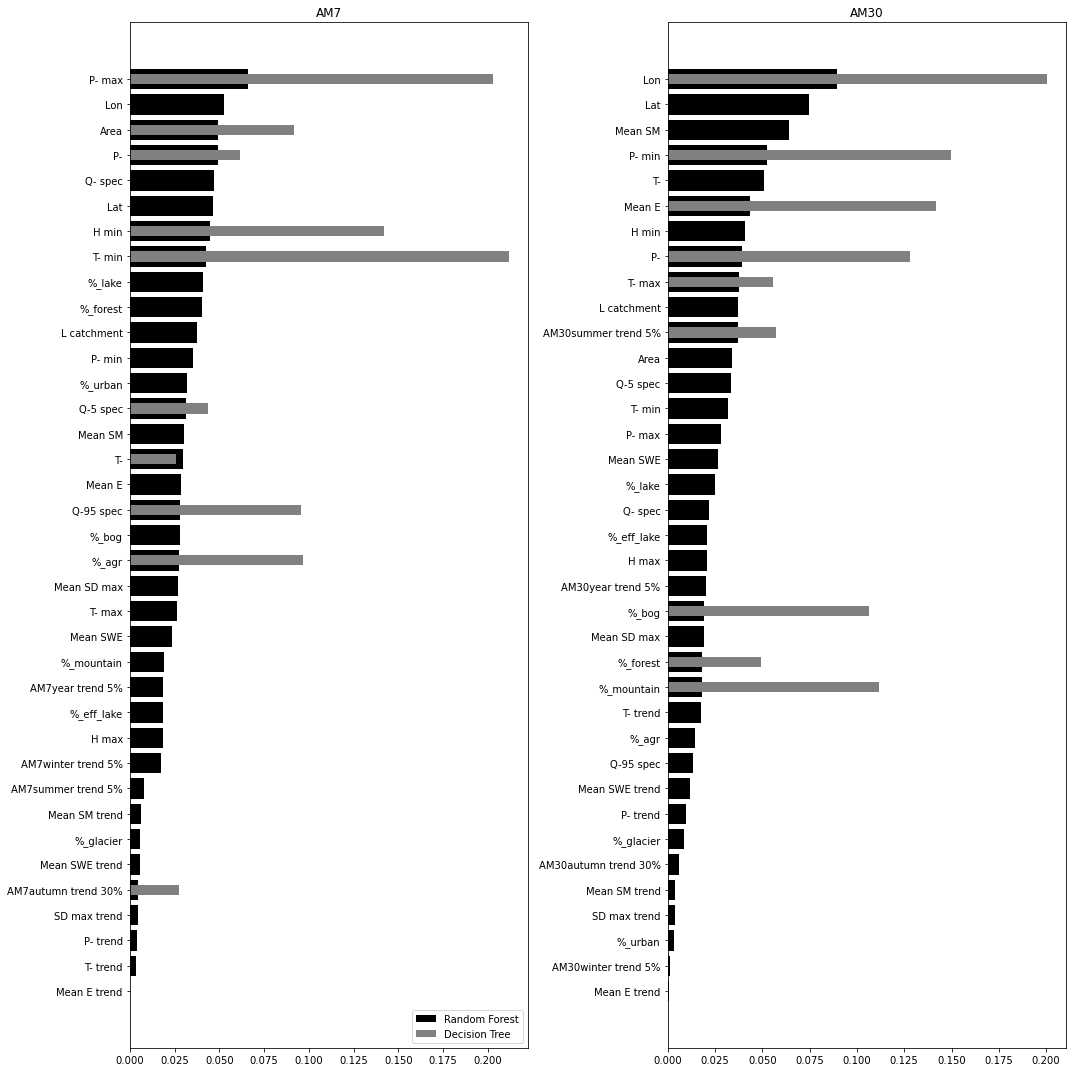

In [74]:
X7spring = X7.drop('AM7spring trend 30%', axis=1)
X30spring = X30.drop('AM30spring trend 30%', axis=1)

fig = plt.figure(figsize=[15,15])
w1 = 0.6
plt.subplot(1,2,1)
plt.title("AM7")
plt.barh(X7spring.columns[fi_7[3]], fi_7_arg[3],  color='black', label="Random Forest")
plt.barh(X7spring.columns[ft_imp7[3]], ft_imp7_arg[3], color='grey', label="Decision Tree", height=w2)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.title("AM30")
plt.barh(X30spring.columns[fi_30[3]], fi_30_arg[3],  color='black')
plt.barh(X30spring.columns[ft_imp30[3]], ft_imp30_arg[3], color='grey', height=w2)
plt.tight_layout()

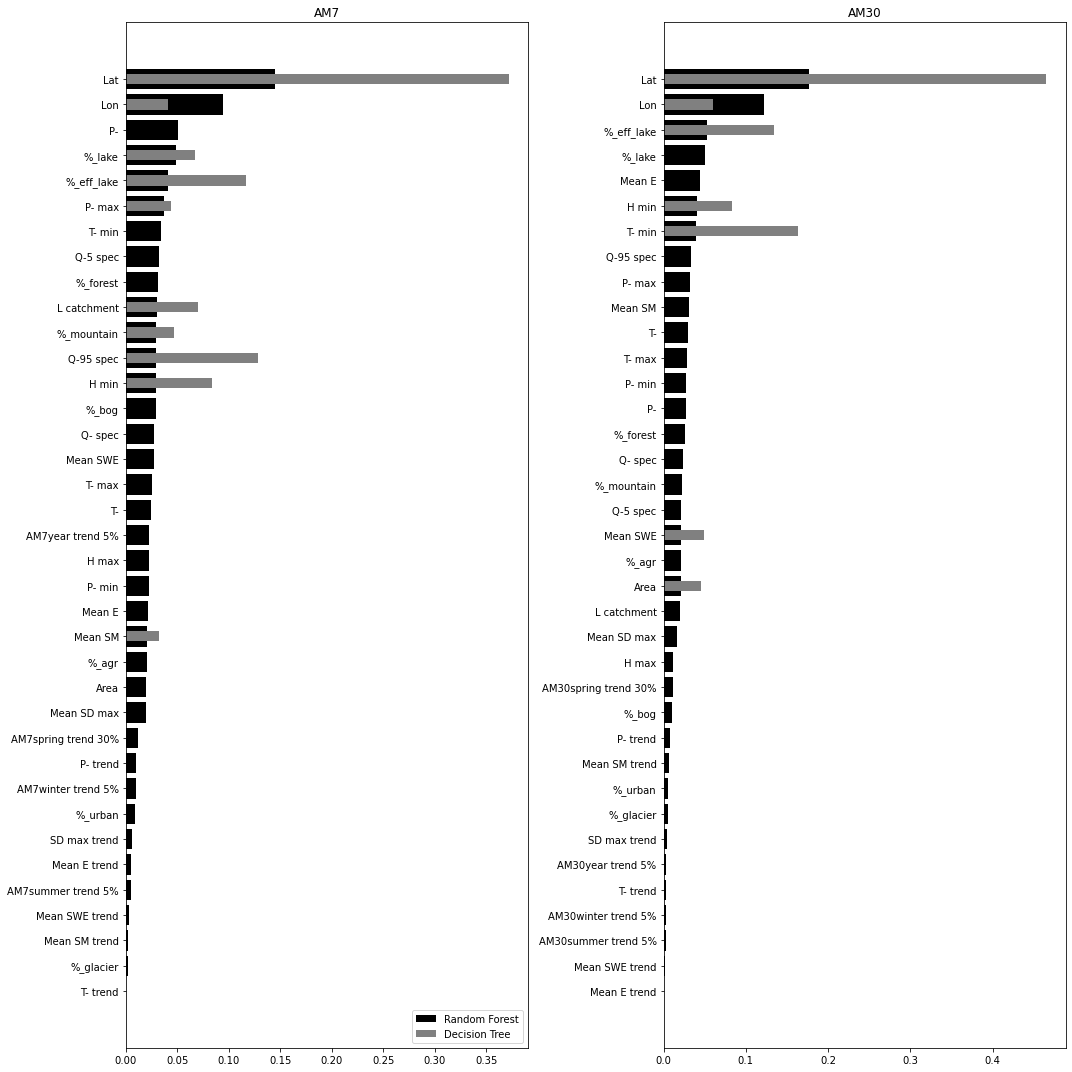

In [75]:
X7autumn = X7.drop('AM7autumn trend 30%', axis=1)
X30autumn = X30.drop('AM30autumn trend 30%', axis=1)

fig = plt.figure(figsize=[15,15])
w1 = 0.6
plt.subplot(1,2,1)
plt.title("AM7")
plt.barh(X7autumn.columns[fi_7[4]], fi_7_arg[4],  color='black', label="Random Forest")
plt.barh(X7autumn.columns[ft_imp7[4]], ft_imp7_arg[4], color='grey', label="Decision Tree", height=w2)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.title("AM30")
plt.barh(X30autumn.columns[fi_30[4]], fi_30_arg[4],  color='black')
plt.barh(X30autumn.columns[ft_imp30[4]], ft_imp30_arg[4], color='grey', height=w2)
plt.tight_layout()